## Tensor 基本操作

In [1]:
import numpy as np
import tensorflow as tf

### 1、广播

In [2]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([100, 101, 102], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 103 105]
 [104 106 108]]


In [3]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([[100], [101]], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 102 103]
 [105 106 107]]


### 2、随机函数

In [4]:
def run_variable(variable):
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        return sess.run(variable)

#### 均匀分布

In [5]:
my_distribution = tf.random_uniform((6, 4), seed=42)
uniform = run_variable(my_distribution)
print(uniform)

[[0.95227146 0.67740774 0.79531825 0.75578177]
 [0.4759556  0.6310148  0.18602037 0.11430776]
 [0.3362218  0.723335   0.21919966 0.8573376 ]
 [0.82392037 0.59541273 0.00296271 0.24725473]
 [0.5060741  0.36158872 0.04483843 0.97216606]
 [0.82838845 0.41458404 0.601666   0.33958685]]


In [6]:
# 使用直方图可视化数组
from matplotlib import pyplot as plt

plt.hist(uniform.flatten())
plt.show()

(array([2., 2., 2., 3., 2., 1., 4., 2., 4., 2.]),
 array([0.00296271, 0.09988304, 0.19680338, 0.2937237 , 0.39064404,
        0.48756438, 0.5844847 , 0.68140507, 0.7783254 , 0.87524575,
        0.97216606], dtype=float32),
 <a list of 10 Patch objects>)

<Figure size 640x480 with 1 Axes>

(array([24089., 23822., 23975., 23939., 23937., 24133., 23951., 24179.,
        24212., 23763.]),
 array([2.0265579e-06, 1.0000143e-01, 2.0000084e-01, 3.0000025e-01,
        3.9999965e-01, 4.9999905e-01, 5.9999847e-01, 6.9999784e-01,
        7.9999727e-01, 8.9999664e-01, 9.9999607e-01], dtype=float32),
 <a list of 10 Patch objects>)

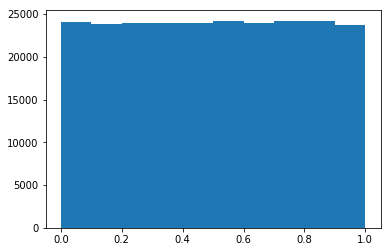

In [7]:
# 增大样本后，均匀的效果更明显
large_normal = tf.random_uniform((600, 400), seed=42)
large_uniform = run_variable(large_normal)

plt.hist(large_uniform.flatten())
plt.show()

#### 正态分布

(array([   7.,   90.,  508., 1649., 2866., 2755., 1540.,  483.,   92.,
          10.]),
 array([112.63174, 124.22182, 135.81189, 147.40196, 158.99203, 170.58212,
        182.1722 , 193.76227, 205.35236, 216.94243, 228.5325 ],
       dtype=float32),
 <a list of 10 Patch objects>)

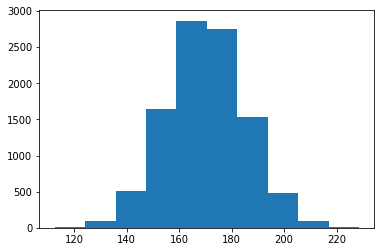

In [8]:
distribution = tf.random_normal((10000,), seed=42, mean=170, stddev=15)
normal = run_variable(distribution)

plt.hist(normal.flatten())
plt.show()

<BarContainer object of 20 artists>

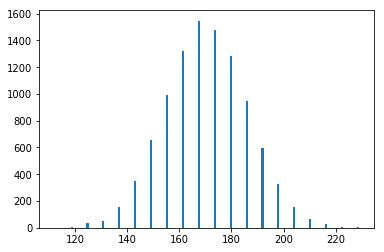

In [9]:
bins = tf.histogram_fixed_width(normal, (normal.min(), normal.max()), nbins=20)
histogram_bins = run_variable(bins)

x_values = np.linspace(normal.min(), normal.max(), len(histogram_bins))
plt.bar(x_values, histogram_bins,)

<BarContainer object of 20 artists>

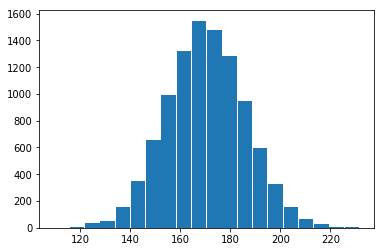

In [10]:
bar_width = (normal.max() - normal.min()) / len(histogram_bins)
plt.bar(x_values, histogram_bins, width=bar_width)

### 3、线性方程

In [11]:
# 点 1
x1 = tf.constant(2, dtype=tf.float32)
y1 = tf.constant(9, dtype=tf.float32)
point1 = tf.stack([x1, y1])

# 点 2
x2 = tf.constant(-1, dtype=tf.float32)
y2 = tf.constant(3, dtype=tf.float32)
point2 = tf.stack([x2, y2])

# 将点组合为数组 [[2,9],[-1,3]]
X = tf.transpose(tf.stack([point1, point2]))

In [12]:
B = tf.ones((1, 2), dtype=tf.float32)

parameters = tf.matmul(B, tf.matrix_inverse(X))

with tf.Session() as session:
    A = session.run(parameters)
    print(A)

[[-0.39999998  0.19999999]]


In [13]:
b = 1 / A[0][1]
a = -b * A[0][0]
print("Equation: y = {a}x + {b}".format(a=a, b=b))

Equation: y = 2.0x + 5.000000298023242


In [16]:
# 使用tf.matrix_solve
points = tf.constant([[2, 1],
                 [0, 5],
                 [-1, 2]], dtype=tf.float32)

A = tf.constant([
    [2, 1, 1],
    [0, 5, 1],
    [-1, 2, 1]
], dtype=tf.float32)

B = -tf.constant([[5.], [25.], [5.]])

X = tf.matrix_solve(A, B)

with tf.Session() as session:
    result = session.run(X)
    D, E, F = result.flatten()

    print("Equation: x**2 + y**2 + {D}x + {E}y + {F} = 0".format(**locals()))

Equation: x**2 + y**2 + -2.0x + -6.0y + 5.0 = 0
